<h1 style='color: blue; font-size: 36px; font-weight: bold;'>Análise da Covid-19 no Brasil</h1>

# Objetivo

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O objetivo deste estudo é realizar uma análise exploratória dos dados relacionados à pandemia do COVID-19 no Brasil, a fim de encontrar padrões, curiosidades e entender melhor a gravidade da disseminação de um vírus.

# Obtenção dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Os dados com que iremos trabalhar foram obtidos do Portal Brasileiro de Dados Abertos. E podem ser acessados por meio dos links abaixo:

https://covid.saude.gov.br/

https://dados.gov.br/dataset

https://dados.gov.br/dataset/notificacao_covid

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Fonte: Ministério da Saúde. Secretaria de Vigilância à Saúde (SVS): Guia de Vigilância Epidemiológica. Secretarias Estaduais e Municipais de Saúde.

# Apresentação dos Dados

## Importanto Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_style("darkgrid")
%matplotlib inline

## Verificando Arquivos no Diretório

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Faremos uma verificação rápida a fim de saber se todos os arquivos que precisamos estão no diretório. Podemos então criar uma lista com todos os arquivos dentro do nosso diretório, e após isso, printaremos cada arquivo para conferirmos.

In [3]:
lista_arquivos = [arquivo for arquivo in os.listdir('./dados')]

for arquivo in lista_arquivos:
    print(arquivo)

HIST_PAINEL_COVIDBR_2020_Parte1_23jun2022.csv
HIST_PAINEL_COVIDBR_2020_Parte2_23jun2022.csv
HIST_PAINEL_COVIDBR_2021_Parte1_23jun2022.csv
HIST_PAINEL_COVIDBR_2021_Parte2_23jun2022.csv
HIST_PAINEL_COVIDBR_2022_Parte1_23jun2022.csv


## Concatenando Arquivos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Criaremos um DataFrame vazio, e aproveitando o loop do item anterior, ao invés de printarmos cada arquivo, iremos ler cada arquivo e concatená-los em um novo DataFrame que armazenaremos na variável <b>todos_arquivos</b>.

In [4]:
todos_arquivos = pd.DataFrame()
i = 1
for arquivo in lista_arquivos:
    df = pd.read_csv('./dados/' + arquivo, sep=';')
    linhas = df.shape[0]
    colunas = df.shape[1]
    print(f'O {i}º arquivo possui {linhas} linhas e {colunas} colunas')
    todos_arquivos = pd.concat([todos_arquivos, df])
    i += 1

lin_total = todos_arquivos.shape[0]    
col_total = todos_arquivos.shape[1]
todos_arquivos.reset_index(drop=True, inplace=True)
print(f'O arquivo final possui {lin_total} linhas e {col_total} colunas')

O 1º arquivo possui 714481 linhas e 17 colunas
O 2º arquivo possui 859707 linhas e 17 colunas
O 3º arquivo possui 1017039 linhas e 17 colunas
O 4º arquivo possui 1033896 linhas e 17 colunas
O 5º arquivo possui 977706 linhas e 17 colunas
O arquivo final possui 4602829 linhas e 17 colunas


In [5]:
todos_arquivos.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como podemos observar, em nosso DataFrame possuímos as seguintes colunas:

<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
<li><b>regiao</b>: Região</li>
<li><b>estado</b>: Estado</li>
<li><b>municipio</b>: Município</li>
<li><b>coduf</b>: Código da Unidade Federativa</li>
<li><b>codmun</b>: Código do Município</li>
<li><b>codRegiaoSaude</b>: Código da Região de Saúde</li>
<li><b>nomeRegiaoSaude</b>: Nome da Região de Saúde</li>    
<li><b>data</b>: Data dos Registros</li>
<li><b>semanaEpi</b>: Semana do Ano</li>
<li><b>populacaoTCU2019</b>: População: Estimativas de 2019 pelo TCU para determinação das cotas FPM (sem sexo e faixa etária)</li>
<li><b>casosAcumulado</b>: Número total de casos confirmados de COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde no período considerado</li>
<li><b>casosNovos</b>: Número de casos novos confirmados de COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde em relação ao dia anterior</li>
<li><b>obitosAcumulado</b>: Número total de óbitos confirmados de COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde no período considerado</li>
<li><b>obitosNovos</b>: Número de óbitos novos confirmados de COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde em relação ao dia anterior</li>
<li><b>Recuperadosnovos</b>: Número total de casos recuperados confirmados de COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde no período considerado</li>
<li><b>emAcompanhamentoNovos</b>: Número total de casos em acompanhamento confirmados de COVID-19 que foram registrados pelas Secretarias Municipais e Estaduais de Saúde no período considerado</li>
<li><b>interior/metropolitana</b>: Variável que assume o valor 0 caso o município faça parte do interior, ou 1 caso faça parte da região metropolitana</li>

# Limpeza dos Dados

## Verificação da Concatenação dos Arquivos

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Iremos verificar se os cabeçalhos dos arquivos que foram concatenados não foram duplicados ou considerados como dados e precisariam ser excluídos. Para isso aplicaremos a contagem dos dados na coluna <b>regiao</b>.

In [6]:
todos_arquivos['regiao'].value_counts()

Nordeste        1484307
Sudeste         1372768
Sul              980436
Centro-Oeste     387511
Norte            376957
Brasil              850
Name: regiao, dtype: int64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Apenas dados relacionados com as Regiões do Brasil foram identificados, portanto podemos assumir que a concatenação está correta.

## Verificação de Dados Missing

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para verificar a presença de dados missing, iremos contabilizar os dados de cada coluna.

In [7]:
todos_arquivos.isnull().sum()

regiao                          0
estado                        850
municipio                   40999
coduf                           0
codmun                      23800
codRegiaoSaude              40999
nomeRegiaoSaude             40999
data                            0
semanaEpi                       0
populacaoTCU2019            17199
casosAcumulado                  0
casosNovos                      0
obitosAcumulado                 0
obitosNovos                     0
Recuperadosnovos          4601979
emAcompanhamentoNovos     4601979
interior/metropolitana      40999
dtype: int64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Algumas colunas apresentam dados nulos ou NaN, portanto iremos tratar esses dados de forma separada entre as colunas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Precisamos entender como os dados se comportam, como vimos anteriormente, em Região, existe a descrição <b>Brasil</b> e podemos observar que, a população total para essa descrição não se altera nas primeiras datas, isso pode afirmar que essa Região apresenta o total acumulado das outras. Então precisamos verificar se existem outras linhas de total, por exemplo, cada Estado possuir o total de seus municípios e cada Região o total de seus Estados.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Vamos selecionar uma data, Estado e Região para avaliar se esse comportamento realmente existe.

In [8]:
# Estado
df = todos_arquivos.query('regiao == "Sudeste" and estado == "SP" and data == "2022-06-05"')
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
3628758,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-06-05,23,45919049.0,5527726.0,0,169415,0,NaN,NaN,NaN
4201218,Sudeste,SP,NaN,35,350000.0,NaN,NaN,2022-06-05,23,NaN,128.0,0,0,0,NaN,NaN,NaN
4201392,Sudeste,SP,Adamantina,35,350010.0,35091.0,ADAMANTINA,2022-06-05,23,35068.0,8492.0,0,171,0,NaN,NaN,0.0
4201566,Sudeste,SP,Adolfo,35,350020.0,35156.0,JOSE BONIFACIO,2022-06-05,23,3562.0,681.0,0,23,0,NaN,NaN,0.0
4201740,Sudeste,SP,Aguaí,35,350030.0,35142.0,MANTIQUEIRA,2022-06-05,23,36305.0,6083.0,0,133,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312752,Sudeste,SP,Votorantim,35,355700.0,35163.0,SOROCABA,2022-06-05,23,122480.0,12429.0,0,562,0,NaN,NaN,0.0
4312926,Sudeste,SP,Votuporanga,35,355710.0,35157.0,VOTUPORANGA,2022-06-05,23,94547.0,17956.0,0,497,0,NaN,NaN,0.0
4313100,Sudeste,SP,Zacarias,35,355715.0,35156.0,JOSE BONIFACIO,2022-06-05,23,2718.0,274.0,0,12,0,NaN,NaN,0.0
4313274,Sudeste,SP,Chavantes,35,355720.0,35094.0,OURINHOS,2022-06-05,23,12418.0,2422.0,0,58,0,NaN,NaN,0.0


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Podemos ver que na primeira linha não possuímos dados de código de município, então somaremos os valores de algumas colunas excluindo a primeira linha para averiguar o montante.

In [9]:
print(df['populacaoTCU2019'][1:].sum())
print(df['casosAcumulado'][1:].sum())
print(df['obitosAcumulado'][1:].sum())

45919049.0
5527726.0
169415


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Comparando os resultados, os valores somados são iguais aos da primeira linha.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Realizaremos a mesma lógica porém retirando a selação do Estado. E neste caso compararemos duas somas, a primeira será apenas das 4 primeiras linhas, uma vez que temos 4 Estados na região sudeste, as quais acreditamos ser o total de cada Estado, e a segunda se inciará a partir da quarta linha.

In [10]:
df = todos_arquivos.query('regiao == "Sudeste" and data == "2022-06-05"')
df

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
3628236,Sudeste,MG,NaN,31,NaN,NaN,NaN,2022-06-05,23,21168791.0,3435501.0,0,61579,0,NaN,NaN,NaN
3628410,Sudeste,ES,NaN,32,NaN,NaN,NaN,2022-06-05,23,4018650.0,1056699.0,234,14418,0,NaN,NaN,NaN
3628584,Sudeste,RJ,NaN,33,NaN,NaN,NaN,2022-06-05,23,17264943.0,2208212.0,0,73830,0,NaN,NaN,NaN
3628758,Sudeste,SP,NaN,35,NaN,NaN,NaN,2022-06-05,23,45919049.0,5527726.0,0,169415,0,NaN,NaN,NaN
4022694,Sudeste,MG,NaN,31,310000.0,NaN,NaN,2022-06-05,23,NaN,4266.0,0,415,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312752,Sudeste,SP,Votorantim,35,355700.0,35163.0,SOROCABA,2022-06-05,23,122480.0,12429.0,0,562,0,NaN,NaN,0.0
4312926,Sudeste,SP,Votuporanga,35,355710.0,35157.0,VOTUPORANGA,2022-06-05,23,94547.0,17956.0,0,497,0,NaN,NaN,0.0
4313100,Sudeste,SP,Zacarias,35,355715.0,35156.0,JOSE BONIFACIO,2022-06-05,23,2718.0,274.0,0,12,0,NaN,NaN,0.0
4313274,Sudeste,SP,Chavantes,35,355720.0,35094.0,OURINHOS,2022-06-05,23,12418.0,2422.0,0,58,0,NaN,NaN,0.0


In [11]:
print(df['populacaoTCU2019'][:4].sum())
print(df['populacaoTCU2019'][4:].sum())
print(df['casosAcumulado'][:4].sum())
print(df['casosAcumulado'][4:].sum())
print(df['obitosAcumulado'][:4].sum())
print(df['obitosAcumulado'][4:].sum())

88371433.0
88371433.0
12228138.0
12228138.0
319242
319242


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Aparentemente estávamos certos, então além dos dados individuais de cada Município, Estado e Região, temos os totais acumulados também.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Iremos tratar as colunas separadamente, então para a coluna <b>estado</b>, substituiremos o valor <b>NaN</b> pela descrição <b>Todos</b>, simbolizando a soma dos itens como vimos anteriormente.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nas colunas <b>municipio</b> e <b>nomeRegiaoSaude</b>, substituiremos o valor <b>NaN</b> pela descrição <b>Não Encontrado</b>, indicando que o registro dos casos não foi atribuído a algum Município ou região de saúde.

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
Para as colunas <b>codmun</b>, <b>codRegiaoSaude</b>, <b>populacaoTCU2019</b>, <b>Recuperadosnovos</b> e <b>emAcompanhamentoNovos</b>, substituiremos o valor <b>NaN</b> por zero.    

<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
A coluna <b>interior/metropolitana</b> já possui o valor zero indicando um tipo de dado, portanto colocaremos o valor 2 para incicar que o dado não possui indicativo se é do interior ou da região metropolitana.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
E por fim passaremos a data para o formato <b>datetime</b> e criaremos colunas com o ano, mês e dia.

In [12]:
todos_arquivos['estado'].fillna('Todos', inplace=True)
todos_arquivos['municipio'].fillna('Não Encontrado', inplace=True)
todos_arquivos['nomeRegiaoSaude'].fillna('Não Encontrado', inplace=True)
todos_arquivos['codmun'].fillna(0, inplace=True)
todos_arquivos['codRegiaoSaude'].fillna(0, inplace=True)
todos_arquivos['populacaoTCU2019'].fillna(0, inplace=True)
todos_arquivos['Recuperadosnovos'].fillna(0, inplace=True)
todos_arquivos['emAcompanhamentoNovos'].fillna(0, inplace=True)
todos_arquivos['interior/metropolitana'].fillna(2, inplace=True)
todos_arquivos['data'] = pd.to_datetime(todos_arquivos['data'])
todos_arquivos['ano'] = todos_arquivos['data'].dt.year
todos_arquivos['mes'] = todos_arquivos['data'].dt.month
todos_arquivos['dia'] = todos_arquivos['data'].dt.day

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Verificando o tipo das variáveis.

In [13]:
todos_arquivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602829 entries, 0 to 4602828
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   regiao                  object        
 1   estado                  object        
 2   municipio               object        
 3   coduf                   int64         
 4   codmun                  float64       
 5   codRegiaoSaude          float64       
 6   nomeRegiaoSaude         object        
 7   data                    datetime64[ns]
 8   semanaEpi               int64         
 9   populacaoTCU2019        float64       
 10  casosAcumulado          float64       
 11  casosNovos              int64         
 12  obitosAcumulado         int64         
 13  obitosNovos             int64         
 14  Recuperadosnovos        float64       
 15  emAcompanhamentoNovos   float64       
 16  interior/metropolitana  float64       
 17  ano                     int64         
 18  me

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Verificando novamente a presença de dados missing.

In [14]:
todos_arquivos.isnull().sum()

regiao                    0
estado                    0
municipio                 0
coduf                     0
codmun                    0
codRegiaoSaude            0
nomeRegiaoSaude           0
data                      0
semanaEpi                 0
populacaoTCU2019          0
casosAcumulado            0
casosNovos                0
obitosAcumulado           0
obitosNovos               0
Recuperadosnovos          0
emAcompanhamentoNovos     0
interior/metropolitana    0
ano                       0
mes                       0
dia                       0
dtype: int64

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Após preenchermos todas as colunas, podemos excluir algumas linhas que não serão interessantes para nós. As linhas onde temos a Região <b>Brasil</b>, como vimos anteriormente apresenta o total geral de todas as Regiões do país, porém não podemos excluí-las pois os dados de casos em acompanhamento e recuperados estão cadastrados nessas linhas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
As linhas onde estão os dados com o total por Estado podem ser excluídas. Seus dados totais estão distribuídos em cada município pertencente ao respectivo Estado. Então baseado no que fizemos antes, iremos selecionar nosso DataFrame, excluindo as linhas onde temos uma Região diferente de <b>Brasil</b>, um Município não encontrado, e um código de município igual a zero.

In [15]:
remover = todos_arquivos[(todos_arquivos['regiao'] != 'Brasil') & 
                       (todos_arquivos['municipio'] == 'Não Encontrado') & 
                       (todos_arquivos['codmun'] == 0)
                      ]
remover

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,ano,mes,dia
158,Norte,RO,Não Encontrado,11,0.0,0.0,Não Encontrado,2020-02-25,9,1777225.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,25
159,Norte,RO,Não Encontrado,11,0.0,0.0,Não Encontrado,2020-02-26,9,1777225.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,26
160,Norte,RO,Não Encontrado,11,0.0,0.0,Não Encontrado,2020-02-27,9,1777225.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,27
161,Norte,RO,Não Encontrado,11,0.0,0.0,Não Encontrado,2020-02-28,9,1777225.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,28
162,Norte,RO,Não Encontrado,11,0.0,0.0,Não Encontrado,2020-02-29,9,1777225.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629990,Centro-Oeste,DF,Não Encontrado,53,0.0,0.0,Não Encontrado,2022-06-19,25,3015268.0,766392.0,0,11708,0,0.0,0.0,2.0,2022,6,19
3629991,Centro-Oeste,DF,Não Encontrado,53,0.0,0.0,Não Encontrado,2022-06-20,25,3015268.0,775399.0,9007,11713,5,0.0,0.0,2.0,2022,6,20
3629992,Centro-Oeste,DF,Não Encontrado,53,0.0,0.0,Não Encontrado,2022-06-21,25,3015268.0,779959.0,4560,11725,12,0.0,0.0,2.0,2022,6,21
3629993,Centro-Oeste,DF,Não Encontrado,53,0.0,0.0,Não Encontrado,2022-06-22,25,3015268.0,783700.0,3741,11733,8,0.0,0.0,2.0,2022,6,22


In [16]:
todos_arquivos = todos_arquivos.drop(remover.index)
todos_arquivos

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,ano,mes,dia
0,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,25
1,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,2.0,2020,2,26
2,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,2.0,2020,2,27
3,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,2.0,2020,2,28
4,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,2.0,2020,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4602824,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-19,25,3015268.0,766392.0,0,11708,0,0.0,0.0,1.0,2022,6,19
4602825,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-20,25,3015268.0,775399.0,9007,11713,5,0.0,0.0,1.0,2022,6,20
4602826,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-21,25,3015268.0,779959.0,4560,11725,12,0.0,0.0,1.0,2022,6,21
4602827,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2022-06-22,25,3015268.0,783700.0,3741,11733,8,0.0,0.0,1.0,2022,6,22


## Exportando o Arquivo Tratado

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Para salvar o tratamento que fizemos vamos exportar os nossos dados tratados para um arquivo novo.

In [17]:
todos_arquivos.to_csv('dados_limpos.csv', index=False)

# Análise Exploratória dos Dados

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Iremos importar o arquivo tratado para iniciarmos a análise exploratória dos dados.

In [18]:
dados = pd.read_csv('dados_limpos.csv')
dados.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,Ano,Mes,Dia
0,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,2.0,2020,2,25
1,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,2.0,2020,2,26
2,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,2.0,2020,2,27
3,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,2.0,2020,2,28
4,Brasil,Todos,Não Encontrado,76,0.0,0.0,Não Encontrado,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,2.0,2020,2,29


## Panorama Geral da Situação da COVID-19 no Brasil na Última Data de Atualização

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como a fonte de dados trabalha com atualizações periódicas, para visualizarmos o panorama geral dos dados, filtraremos nosso DataFrame principal sempre pela última data cadastrada. E por fim, agruparemos em um novo DataFrame somando os dados.

In [19]:
ultima_data = dados['data'].sort_values(ascending=False).iloc[0]
print(f'Última atualização em: {ultima_data}')

Última atualização em: 2022-06-23


### Panorama Geral por Região

In [20]:
reg_resumo = dados[dados['data'] == ultima_data]
reg_resumo = reg_resumo.groupby('regiao')[['populacaoTCU2019','casosAcumulado', 'casosNovos', 'obitosAcumulado', 
                                           'obitosNovos','Recuperadosnovos', 'emAcompanhamentoNovos']].sum()
reg_resumo

,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
regiao,,,,,,,
Brasil,210147125.0,31962782.0,72049,669895,365,30554684.0,738203.0
Centro-Oeste,16297074.0,3545300.0,15195,63837,46,0.0,0.0
Nordeste,57071654.0,6359786.0,11971,129426,20,0.0,0.0
Norte,18430980.0,2529411.0,1787,50307,4,0.0,0.0
Sudeste,88371433.0,12624677.0,32255,320841,199,0.0,0.0
Sul,29975984.0,6903608.0,10841,105484,96,0.0,0.0


### Panorama Geral por Estado

In [21]:
est_resumo = dados[dados['data'] == ultima_data]
est_resumo = est_resumo.groupby(['regiao', 'estado'])[['populacaoTCU2019','casosAcumulado', 'casosNovos', 
                                                       'obitosAcumulado', 'obitosNovos','Recuperadosnovos', 
                                                       'emAcompanhamentoNovos']].sum().reset_index()
est_resumo

,regiao,estado,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,Todos,210147125.0,31962782.0,72049,669895,365,30554684.0,738203.0
1,Centro-Oeste,DF,3015268.0,787650.0,3950,11739,6,0.0,0.0
2,Centro-Oeste,GO,7018354.0,1462920.0,9408,26801,37,0.0,0.0
3,Centro-Oeste,MS,2778986.0,546632.0,0,10610,0,0.0,0.0
4,Centro-Oeste,MT,3484466.0,748098.0,1837,14687,3,0.0,0.0
5,Nordeste,AL,3337357.0,302247.0,267,6943,1,0.0,0.0
6,Nordeste,BA,14873064.0,1564900.0,1903,30010,1,0.0,0.0
7,Nordeste,CE,9132078.0,1255319.0,916,27157,5,0.0,0.0
8,Nordeste,MA,7075181.0,441756.0,130,10892,1,0.0,0.0
9,Nordeste,PB,4018127.0,613819.0,2289,10241,2,0.0,0.0


## Casos Acumulados x Óbitos Acumulados por Estado

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Aproveitaremos o DataFrame do panorama geral da COVID-19 na última data de atualização por Estado, para criar um gráfico de dispersão, o qual apresentará no eixo x os óbitos acumulados, e no eixo y, os casos acumulados.

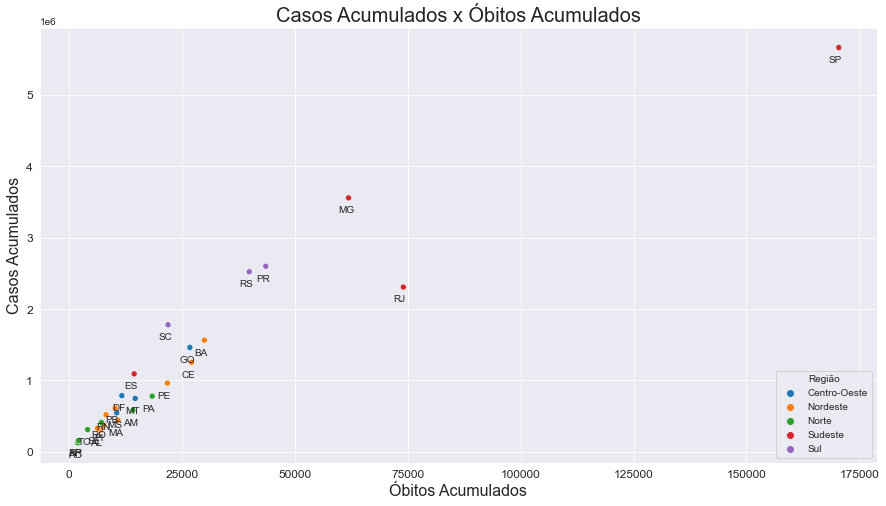

In [22]:
casos = list(est_resumo['casosAcumulado'])
obitos = list(est_resumo['obitosAcumulado'])
estado = list(est_resumo['estado'])

plt.figure(figsize=[15,8])
ax = sns.scatterplot(data=est_resumo[1:], x='obitosAcumulado', y='casosAcumulado', hue='regiao')
ax.set_title('Casos Acumulados x Óbitos Acumulados', fontsize=20)
ax.set_xlabel('Óbitos Acumulados', fontsize=16)
ax.set_ylabel('Casos Acumulados', fontsize=16)

for num_casos, num_obitos, estado in zip(casos, obitos, estado):
    plt.annotate(estado,
        xy=(num_obitos, num_casos), 
        xytext=(-10, -15),                  
        textcoords='offset points')
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Região', fontsize='medium', loc=4)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como podemos observar, o Estado de São Paulo possui o maior valor tanto de casos acumulados quanto de óbitos acumulados. Sabemos que é um dos Estados mais populosos do país, portanto a incidência de casos é alta, o que justifica a tendência apresentada.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Logo abaixo, podemos notar que os Estados de Minas Gerais e Rio de Janeiro (também pertencentes à Região Sudeste), apresentam altos valores de casos e óbitos acumulados. Isso possivelmente indica que a Região Sudeste, a região mais populosa do país, é a região com os maiores valores de casos acumulados e óbitos acumulados. Apenas o último Estado, Espírito Santo, possui valores mais moderados de casos e óbitos acumulados até o momento.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A Região Sul possui seus 3 Estados bem próximos uns dos outros no gráfico, também com valores altos de casos e óbitos acumulados.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
A Região Norte, apesar de possuir um número maior de Estados, não apresentou valores tão elevados quanto as regiões Sul e Sudeste, porém, estamos aqui tratando de vidas e saúde, portanto não podemos encarar esse valores como bons.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
As Regiões Centro-Oeste e Nordeste, possuem valores de casos e óbitos medianos quando comparados com as outras Regiões, mas ainda assim não podemos dizer que a situação é boa.

## Casos Novos x Óbitos Novos nos Últimos 2 Meses

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nossa fonte possui um número considerável de dados, portanto para esse acompanhamento observaremos apenas os dados dos dois últimos meses, considerando um total aproximado de 60 dias.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Criaremos um novo DataFrame onde selecionaremos a Região <b>Brasil</b>, agruparemos a somatória dos dados por meio da data, retiraremos os 60 últimos registros e reiniciaremos a contagem do index.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por fim, plotaremos um gráfico de barras e linhas para visualizarmos a tendência dos casos novos (barras) e dos óbitos novos (linhas).

In [23]:
ult_dois_meses = dados[dados['regiao'] == 'Brasil']
ult_dois_meses = ult_dois_meses.groupby('data').sum()[-60:].reset_index()
ult_dois_meses.head()

,data,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,Ano,Mes,Dia
0,2022-04-25,76,0.0,0.0,17,210147125.0,30355919.0,6456,662722,76,29411813.0,281384.0,2.0,2022,4,25
1,2022-04-26,76,0.0,0.0,17,210147125.0,30378061.0,22142,662866,144,29450841.0,264354.0,2.0,2022,4,26
2,2022-04-27,76,0.0,0.0,17,210147125.0,30399004.0,20943,663111,245,29480998.0,254895.0,2.0,2022,4,27
3,2022-04-28,76,0.0,0.0,17,210147125.0,30418920.0,19916,663225,114,29499422.0,256273.0,2.0,2022,4,28
4,2022-04-29,76,0.0,0.0,17,210147125.0,30433042.0,14122,663410,185,29507557.0,262075.0,2.0,2022,4,29


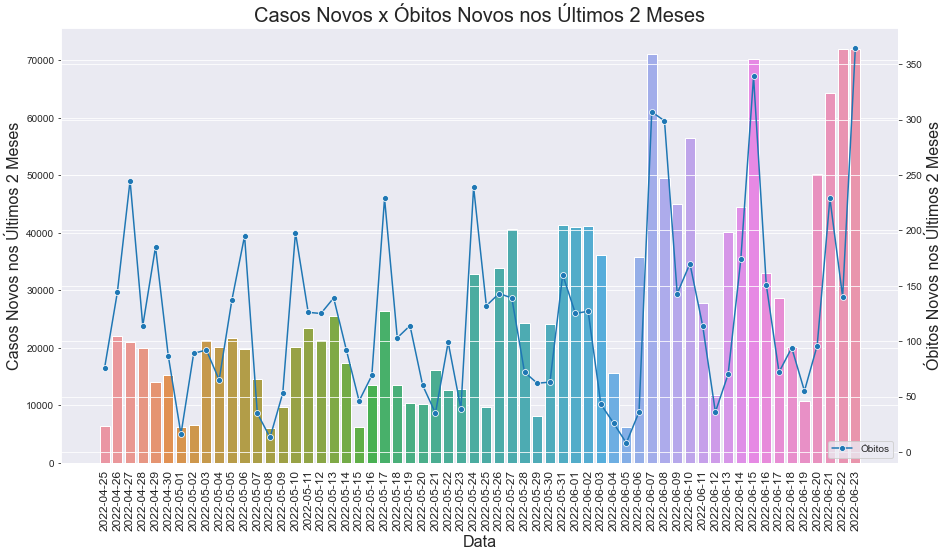

In [46]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.figure.set_size_inches(15,8)
ax1.set_title('Casos Novos x Óbitos Novos nos Últimos 2 Meses', fontsize=20)
ax1 = sns.barplot(data=ult_dois_meses, x='data', y='casosNovos', ax=ax1)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_xticklabels(ult_dois_meses['data'], rotation=90, fontsize=12)
ax1.set_ylabel('Casos Novos nos Últimos 2 Meses', fontsize=16)
ax2 = sns.lineplot(data=ult_dois_meses, x='data', y='obitosNovos', marker='o', ax=ax2)
ax2.set_ylabel('Óbitos Novos nos Últimos 2 Meses', fontsize=16)
plt.legend(labels=['Óbitos'], fontsize='medium', loc=4)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Por meio do gráfico, podemos inferir que, nos últimos dois meses, o número de casos tem crescido consideravelmente, atingindo picos que ultrapassam os 70 mil casos. Enquanto o número de óbitos novos nos últimos dois meses apresenta uma oscilação durante todo esse período, porém, apesar de em alguns dias o número de óbitos novos registrado ser baixo, em outros dias esse número cresce atingindo valores acima de 350, o que é extremamente preocupante.

## Casos Novos por Região nos Últimos Dois Meses

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Faremos uma análise dos casos novos em cada Região do Brasil. Para isso, criaremos um novo DataFrame onde selecionaremos as Regiões agrupando os dados por meio da data. E consideraremos os últimos dois meses apenas. Ao final, plotaremos um gráfico de linhas para cada região.
   
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Neste caso, selecionaremos as últimas 300 linhas do nosso DataFrame, uma vez que temos 5 Regiões e estamos considerando 60 dias para cada uma delas. Dessa forma a data inicial deverá ser a mesma do item anterior.

In [24]:
reg_ult_dois_meses = dados[dados['regiao'] != 'Brasil']
reg_ult_dois_meses = reg_ult_dois_meses.groupby(['data','regiao']).sum()[-300:].reset_index()
reg_ult_dois_meses.head()

,data,regiao,coduf,codmun,codRegiaoSaude,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,Ano,Mes,Dia
0,2022-04-25,Centro-Oeste,24089,241278156.0,23989599.0,7973,16297074.0,3271950.0,1578,63193,10,0.0,0.0,33.0,948318,1876,11725
1,2022-04-25,Nordeste,45282,454484354.0,45073113.0,30651,57071654.0,6232378.0,754,128546,9,0.0,0.0,134.0,3645666,7212,45075
2,2022-04-25,Norte,6673,66973508.0,6633174.0,7701,18430980.0,2490829.0,539,50034,12,0.0,0.0,53.0,915966,1812,11325
3,2022-04-25,Sudeste,54681,551866252.0,54654725.0,28424,88371433.0,11895797.0,1969,316860,29,0.0,0.0,130.0,3380784,6688,41800
4,2022-04-25,Sul,50246,503915287.0,50134788.0,20298,29975984.0,6464965.0,1616,104089,16,0.0,0.0,78.0,2414268,4776,29850


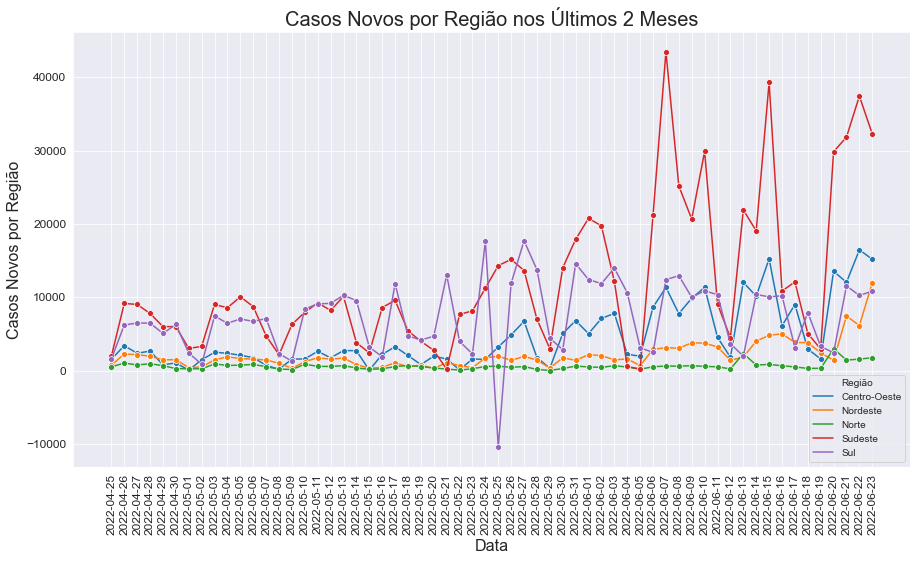

In [25]:
plt.figure(figsize=[15,8])
ax = sns.lineplot(data=reg_ult_dois_meses, x='data', y='casosNovos', hue='regiao', marker='o')
ax.set_title('Casos Novos por Região nos Últimos 2 Meses', fontsize=20)
ax.set_xlabel('Data', fontsize=16)
ax.set_ylabel('Casos Novos por Região', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Região', fontsize='medium', loc=4)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Como podemos observar, o gráfico apresenta um ponto bem fora do comum no dia 25 de maio de 2022, um valor negativo de aproximadamente 10300 casos novos na Região Sul. Procuraremos esse valor em nosso DataFrame para avaliar.

In [26]:
dados[(dados['regiao'] == 'Sul') & (dados['data'] == '2022-05-25')].sort_values(by='casosNovos', ascending=True)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,Ano,Mes,Dia
4307017,Sul,PR,Curitiba,41,410690.0,41002.0,2ª RS METROPOLITANA,2022-05-25,21,1933105.0,226732.0,-23397,8183,-5,0.0,0.0,1.0,2022,5,25
4291357,Sul,PR,Almirante Tamandaré,41,410040.0,41002.0,2ª RS METROPOLITANA,2022-05-25,21,118623.0,16221.0,-48,455,2,0.0,0.0,1.0,2022,5,25
4295533,Sul,PR,Balsa Nova,41,410230.0,41002.0,2ª RS METROPOLITANA,2022-05-25,21,12941.0,2886.0,-15,36,0,0.0,0.0,1.0,2022,5,25
4313629,Sul,PR,Guaporema,41,410910.0,41013.0,13ª RS CIANORTE,2022-05-25,21,2243.0,598.0,-7,5,0,0.0,0.0,0.0,2022,5,25
4303363,Sul,PR,Cerro Azul,41,410520.0,41002.0,2ª RS METROPOLITANA,2022-05-25,21,17779.0,2049.0,-2,55,0,0.0,0.0,1.0,2022,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4465879,Sul,RS,Pelotas,43,431440.0,43021.0,REGIAO 21,2022-05-25,21,342405.0,85607.0,378,1344,0,0.0,0.0,0.0,2022,5,25
4327027,Sul,PR,Maringá,41,411520.0,41015.0,15ª RS MARINGA,2022-05-25,21,423666.0,126302.0,428,1764,0,0.0,0.0,0.0,2022,5,25
4428469,Sul,RS,Caxias do Sul,43,430510.0,43023.0,REGIAO 23,2022-05-25,21,510906.0,138782.0,514,1568,1,0.0,0.0,0.0,2022,5,25
4375573,Sul,SC,Florianópolis,42,420540.0,42007.0,GRANDE FLORIANOPOLIS,2022-05-25,21,500973.0,126201.0,699,1259,0,0.0,0.0,1.0,2022,5,25


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Na cidade de Curitiba-PR existe o valor negativo de 23397 casos novos registrado. Existem outros valores negativos cadastrados, porém esse é o maior dentre eles. O valor é suspeito pois estamos lidando com uma variável que tende a somar sempre que é registrada, portanto a lógica é que sempre haja valores positivos de casos novos. Seria necessário conferir a fonte original dos dados para concluir se esses valores negativos estão corretos ou não.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
De qualquer forma, o gráfico deixa evidente que a Região Sudeste apresenta, nos últimos dois meses, os maiores números de casos novos, principalmente nas últimas semanas, onde os registros possuem valores altíssimos. Um dos motivos que justifica esse comportamento, é que a Região Sudeste é a mais populosa do país, com aproximadamente 88 milhões de pessoas, representando 42% da população do Brasil, portanto é de se esperar que ela apresente mais casos novos sendo registrados.

## Coeficiente de Incidência e Mortalidade

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Antes de entrarmos neste tópico, precisamos verificar como a fonte original dos dados conceitua e determina a metodologia do cálculo, do coeficiente de incidência e do coeficiente de mortalidade por COVID-19.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Segundo a fonte dos dados, o coeficiente de incidência é o número de casos confirmados de COVID-19, por 100 mil habitantes, na população residente em determinado espaço geográfico, no ano considerado. E o coeficiente de mortalidade é o número de óbitos por COVID-19, por 100 mil habitantes, na população residente em determinado espaço geográfico, no ano considerado.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O coeficiente de incidência é calculado como: Número de casos confirmados de COVID-19 em residentes x 100.000 / população do período. 
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>    
E o coeficiente de mortalidade é calculado como: Número de óbitos por COVID-19 em residentes x 100.000 / população do período.

In [27]:
dados['coefIncidencia'] = round((dados['casosAcumulado'] / dados['populacaoTCU2019'] * 100000), 2)
dados['coefMortalidade'] = round((dados['obitosAcumulado'] / dados['populacaoTCU2019'] * 100000), 2)

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Após calcularmos os dois coeficientes, criaremos um DataFrame apenas com os dados da última data de atualização, agruparemos os valores por meio da Região, e exibiremos apenas o resultado da Região Brasil.

In [28]:
inc_e_mor = dados[dados['data'] == ultima_data]
inc_e_mor = inc_e_mor.groupby('regiao')[['populacaoTCU2019','casosAcumulado', 'coefIncidencia', 'obitosAcumulado', 
                           'coefMortalidade']].sum()

coef_inc = inc_e_mor['coefIncidencia'][0]
coef_mor = inc_e_mor['coefMortalidade'][0]

inc_e_mor[:1]

,populacaoTCU2019,casosAcumulado,coefIncidencia,obitosAcumulado,coefMortalidade
regiao,,,,,
Brasil,210147125.0,31962782.0,15209.72,669895,318.77


In [29]:
print(f'No momento, em {ultima_data}, no Brasil, o coeficiente de incidência dos casos de COVID-19 é de {coef_inc} por 100 mil habitantes, e o coeficiente de mortalidade por COVID-19 é de {coef_mor} por 100 mil habitantes.')

No momento, em 2022-06-23, no Brasil, o coeficiente de incidência dos casos de COVID-19 é de 15209.72 por 100 mil habitantes, e o coeficiente de mortalidade por COVID-19 é de 318.77 por 100 mil habitantes.


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
É interessante analisarmos a curva dos coeficientes, então plotaremos um gráfico de dispersão entre o coeficiente de incidência e o coeficiente de mortalidade. Uma vez que cada ponto do gráfico representa uma data em nosso DataFrame, o resultado deverá ser a curva de evolução entre os dois coeficientes.

In [30]:
inc_e_mor_brasil = dados[dados['regiao'] == 'Brasil']
inc_e_mor_brasil = inc_e_mor_brasil.groupby('data')[['coefIncidencia', 'coefMortalidade']].sum().reset_index()
inc_e_mor_brasil['ano'] = inc_e_mor_brasil['data'].apply(lambda x: x.split('-')[0])
inc_e_mor_brasil.tail()

,data,coefIncidencia,coefMortalidade,ano
845,2022-06-19,15086.67,318.38,2022
846,2022-06-20,15110.59,318.43,2022
847,2022-06-21,15141.21,318.53,2022
848,2022-06-22,15175.43,318.60,2022
849,2022-06-23,15209.72,318.77,2022


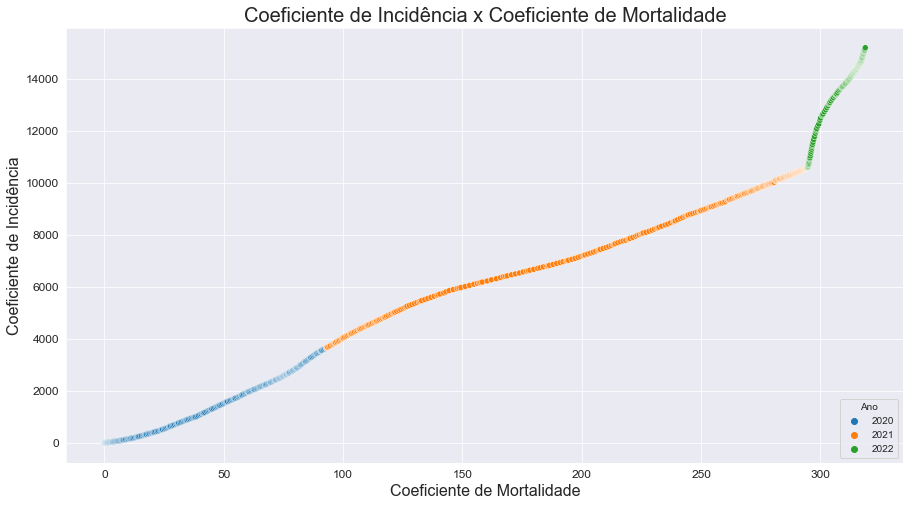

In [31]:
plt.figure(figsize=[15,8])
ax = sns.scatterplot(data=inc_e_mor_brasil, x='coefMortalidade', y='coefIncidencia', hue='ano')
ax.set_title('Coeficiente de Incidência x Coeficiente de Mortalidade', fontsize=20)
ax.set_xlabel('Coeficiente de Mortalidade', fontsize=16)
ax.set_ylabel('Coeficiente de Incidência', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Ano', fontsize='medium', loc=4)
plt.yticks(fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Podemos verificar que a curva sempre apresenta uma tendência crescente, isso era esperado, uma vez que os dados são atualizados conforme são registrados, ou seja, sempre somam em relação ao registro anterior. Porém, um ponto importante que nos é apresentado, é que em 2020 como foi o ano em que a pandemia teve início, a inclinação da curva não é tão íngrime, já em 2021 o aspecto da inclinação se parece com 2020, mas se analisarmos a variação do coeficiente de incidência e do coeficiente de mortalidade, chegamos a conclusão que houve um aumento significativo em ambos os coeficientes.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
O que mais assusta é que em 2022, a variação do coeficiente de incidência está perto da variação em 2021, e nós não possuímos ainda dados do ano completo de 2022. Isso sinaliza que houve um aumento no numéro de casos novos em 2022, vimos esse comportamento analisando os dois últimos meses anteriormente, e que as medidas de precaução para diminuir a disseminação do COVID-19 precisam ser mantidas e em alguns casos reforçadas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Analisando a variação do coeficiente de mortalidade, tanto em determinado momento em 2021, quanto em 2022, vemos que essa variação diminui, muito possivelmente por conta do início da vacinação no Brasil. Mesmo a diminuição desse coeficiente sendo boa, como estamos nos referindo à vidas, ainda o cenário não é o ideal.

## Taxa de Letalidade

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Segundo a fonte dos dados, a taxa de letalidade é conceituada como o número de óbitos confirmados por COVID-19 em relação ao total de casos confirmados, na população residente em determinado espaço geográfico, no período considerado.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
É calculada como: Número de óbitos confirmados de COVID-19 em determinada área e período x 100 / Número de casos confirmados de COVID-19 em determinada área e período.

In [32]:
dados['taxaLetalidade'] = round((dados['obitosAcumulado'] / dados['casosAcumulado'] * 100), 2)
letal = dados[dados['data'] == ultima_data]
letal = letal.groupby('regiao')[['populacaoTCU2019','casosAcumulado','obitosAcumulado', 'taxaLetalidade']].sum()

tx_letal = letal['taxaLetalidade'][0]

letal[:1]

,populacaoTCU2019,casosAcumulado,obitosAcumulado,taxaLetalidade
regiao,,,,
Brasil,210147125.0,31962782.0,669895,2.1


In [33]:
print(f'No momento, em {ultima_data}, no Brasil, a taxa de letalidade por COVID-19 é de {tx_letal} %.')

No momento, em 2022-06-23, no Brasil, a taxa de letalidade por COVID-19 é de 2.1 %.


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Da mesma forma que fizemos no item anterior, vamos analisar a curva da taxa de letalidade em relação aos casos confirmados, criando um gráfico de dispersão, onde, no eixo y será representado o percentual da taxa de letalidade, no eixo x, o número de casos confirmados, e cada ponto disperso será uma data em nosso DataFrame.

In [34]:
letal_brasil = dados[dados['regiao'] == 'Brasil']
letal_brasil = letal_brasil.groupby('data')[['casosAcumulado', 'taxaLetalidade']].sum().reset_index()
letal_brasil['ano'] = letal_brasil['data'].apply(lambda x: x.split('-')[0])
letal_brasil.tail()

,data,casosAcumulado,taxaLetalidade,ano
845,2022-06-19,31704193.0,2.11,2022
846,2022-06-20,31754465.0,2.11,2022
847,2022-06-21,31818827.0,2.10,2022
848,2022-06-22,31890733.0,2.10,2022
849,2022-06-23,31962782.0,2.10,2022


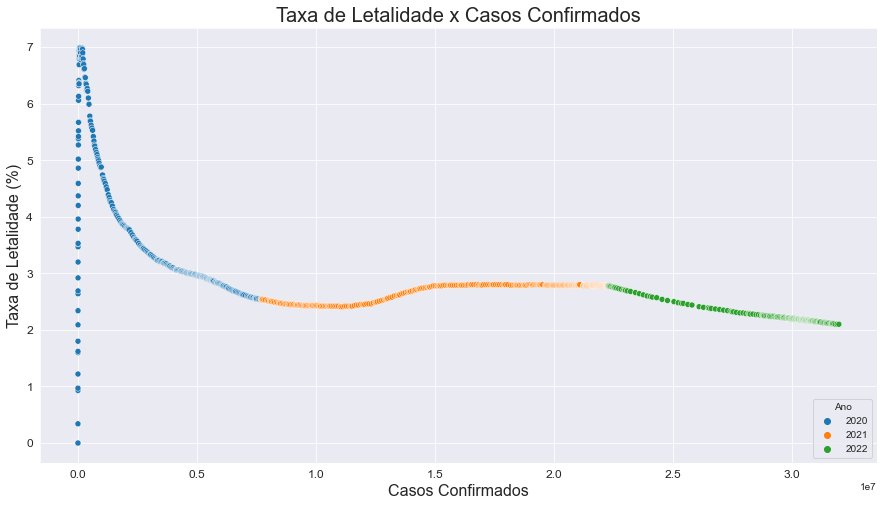

In [35]:
plt.figure(figsize=[15,8])
ax = sns.scatterplot(data=letal_brasil, x='casosAcumulado', y='taxaLetalidade', hue='ano')
ax.set_title('Taxa de Letalidade x Casos Confirmados', fontsize=20)
ax.set_xlabel('Casos Confirmados', fontsize=16)
ax.set_ylabel('Taxa de Letalidade (%)', fontsize=16)
plt.xticks(fontsize=12)
plt.legend(title='Ano', fontsize='medium', loc=4)
plt.yticks(fontsize=12)
plt.show()

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Analisando a curva do gráfico, observamos que logo no começo da pandemia, quando os primeiros casos confirmados foram registrados, a taxa de letalidade subiu e atingiu um valor extremamente alto de aproximadamente 7%. Com o decorrer do tempo, essa taxa de letalidade vai diminuindo em todo o ano de 2020. Em 2021, a taxa de letalidade diminui levemente no começo do ano, porém volta a subir, se mantendo quase que constante até o final do ano. Apesar de em 2021 as campanhas de vacinação terem avançado, a taxa de letalidade voltou a subir. Isso pode ser proveniente de situações onde pessoas continuaram não se vacinando, ou pessoas que tomaram a primeira dose, não foram tomar a segunda dose da vacina, não garantindo assim uma maior proteção contra o vírus da COVID-19. Do começo de 2022 até o momento deste estudo, a taxa de letalidade voltou a diminuir, mas ainda não está perto do ideal, sempre lembrando que estamos falando de vidas. Mesmo com a vacinação avançando, e mais pessoas tomando a segunda dose, e até a terceira dose, um dos problemas, como vimos no item anterior, é que por mais que a taxa de letalidade tenha voltado a diminuir, o número de casos confirmados voltou a aumentar, e com isso, medidas de prevenção devem ser retomadas e reforçadas.

## Região Metropolitana e Interior

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Nossos dados possuem a segmentação se o local de registro faz parte do interior ou da região metropolitana. Iremos analisar como está a situação dos casos novos e óbitos acumulados nestas regiões. Para isso criaremos um DataFrame novo selecionando a última data registrada e apenas os números 0 e 1 da coluna <b>interior/metropolitana</b>. Preenchemos com o número 2 os dados NaN quando limpamos os dados dessa coluna.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Esse novo DataFrame será agrupado pela coluna <b>interior/metropolitana</b>, e em seguida criaremos 3 colunas que calcularão os percentuais de cada parte em relação ao todo para a população do Brasil, os casos acumulados e os óbitos acumulados.

In [36]:
inte_metro = dados[(dados['data'] == ultima_data) & (dados['interior/metropolitana'] !=2)]
inte_metro = inte_metro.groupby('interior/metropolitana')[['populacaoTCU2019', 'casosAcumulado', 
                                                           'obitosAcumulado']].sum()

inte_metro['População (%)'] = round((inte_metro['populacaoTCU2019'] / inte_metro['populacaoTCU2019'].sum() * 100), 2)
inte_metro['Casos Acumulados (%)'] = round((inte_metro['casosAcumulado'] / inte_metro['casosAcumulado'].sum() * 100), 2)
inte_metro['Óbitos Acumulados (%)'] = round((inte_metro['obitosAcumulado'] / inte_metro['obitosAcumulado'].sum() * 100), 2)

inte_metro

,populacaoTCU2019,casosAcumulado,obitosAcumulado,População (%),Casos Acumulados (%),Óbitos Acumulados (%)
interior/metropolitana,,,,,,
0.0,120532263.0,19748912.0,339557,57.36,61.91,50.79
1.0,89614862.0,12149840.0,329034,42.64,38.09,49.21


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Plotaremos um gráfico de barras para cada coluna de percentual.

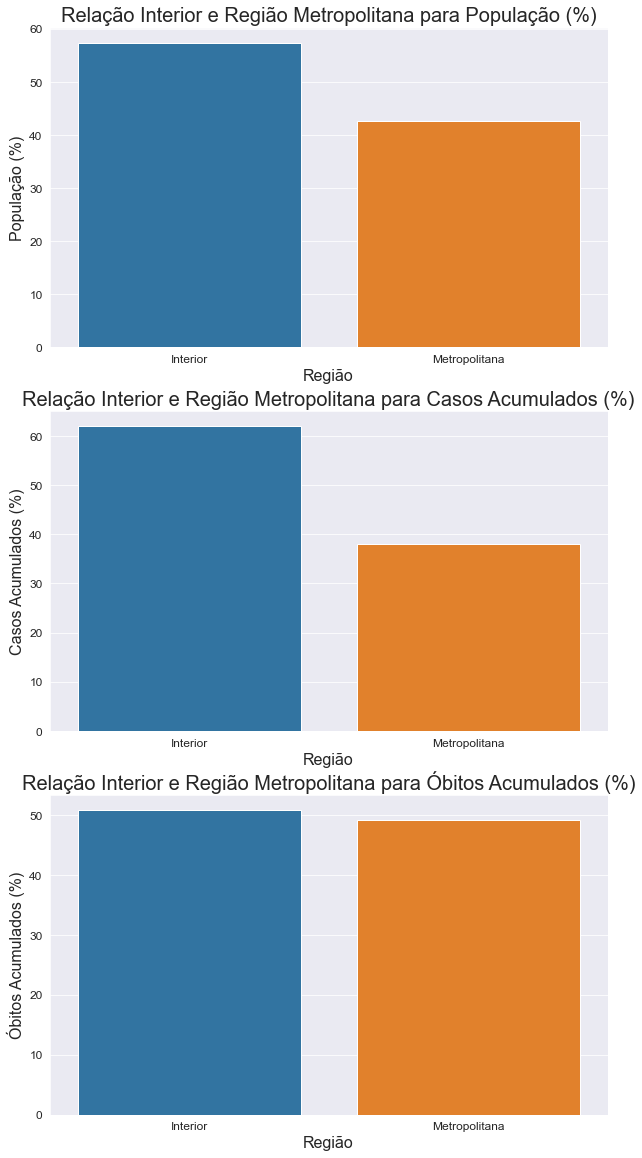

In [37]:
plt.figure(figsize=[10, 20])

i = 1

for coluna in list(inte_metro.columns[3:]):
    plt.subplot(3, 1, i)
    ax = sns.barplot(data=inte_metro, y=inte_metro[coluna], x=inte_metro.index)
    ax.set_title(f'Relação Interior e Região Metropolitana para {coluna}', fontsize=20)
    ax.set_xlabel('Região', fontsize=16)
    ax.set_ylabel(f'{coluna}', fontsize=16)
    plt.xticks(ticks=inte_metro.index, labels=['Interior', 'Metropolitana'], fontsize=12)
    plt.yticks(fontsize=12)
    i+=1
    

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Analisando os gráficos vemos que a maior parte da população do Brasil se encontra no interior. O número de casos acumulados tambem é maior no interior, isso pode ser justamente porque a maior parte da população se encontra nesta região. O interessante é que, quando olhamos para o gráfico dos óbitos acumulados, a diferença entre as duas regiões é pequena, mesmo assim o interior apresenta uma maior porcentagem de óbitos acumulados.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Quando pensamos intuitivamente, o interior por ter mais pessoas, deveria apresentar o número de casos e de óbitos maior, e realmente isso nos é apresentado, porém a diferença no número de óbitos é muito pequena para simplesmente dizer que no interior existem mais óbitos por terem mais pessoas. Avaliando essa diferença pequena, a impressão que temos é que a taxa de letalidade em ambas as regiões, é próxima uma da outra. Vamos verificar se isso é verdadeiro.  

In [40]:
let_inte = round((inte_metro['obitosAcumulado'][0] / inte_metro['casosAcumulado'][0] * 100), 2)
let_metro = round((inte_metro['obitosAcumulado'][1]/ inte_metro['casosAcumulado'][1] * 100), 2)

print(f'A taxa de letalidade no interior é de: {let_inte} %')
print(f'A taxa de letalidade na região metropolitana é de: {let_metro} %')

A taxa de letalidade no interior é de: 1.72 %
A taxa de letalidade na região metropolitana é de: 2.71 %


<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Dessa forma, confirmamos que no interior a taxa de letalidade é menor. Mesmo os números de óbitos, nas duas regiões, sendo próximos, o número de casos confirmados no interior é muito superior ao da região metropolitana, isso diminui a taxa de letalitade, uma vez que ela é a relação entre o número de óbitos e o número de casos confirmados.

# Conclusão

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
Neste estudo vimos como a disseminação do vírus da COVID-19 ainda permanece como um problema sério no Brasil. Analisamos o panorama geral da situação, o cenário nas Regiões e Estados do país, como os casos e óbitos novos se comportaram nos últimos meses, os coeficientes de incidência e mortalidade, a taxa de letalidade, e, como está a situação quando separamos os registros no interior e nas regiões metropolitanas.
    
<p style='font-size: 18px; line-height: 2; text-align: justify;'>
De forma geral, ainda há muito o que fazer para conter a disseminação do vírus da COVID-19, medidas de segurança devem ser reforçadas. Todas as informações registradas na base de dados, e os estudos realizados por meio desses registros podem auxiliar as instituições e órgãos de saúde a tomar decisões e criar estratégias que visem salvar cada vez mais vidas.   

# Referências

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
PORTAL BRASILEIRO DE DADOS ABERTOS. Dados.gov.br. Disponível em: https://dados.gov.br/dataset. Acesso em 23 jun. 2022

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
PORTAL BRASILEIRO DE DADOS ABERTOS. Dados.gov.br. Disponível em: https://dados.gov.br/dataset/notificacao_covid. Acesso em 23 jun. 2022

<p style='font-size: 18px; line-height: 2; text-align: justify;'>
CORONAVÍRUS BRASIL PAINEL CORONAVÍRUS. Covid.Saude.gov.br. Disponível em: https://covid.saude.gov.br/. Acesso em 23 jun. 2022